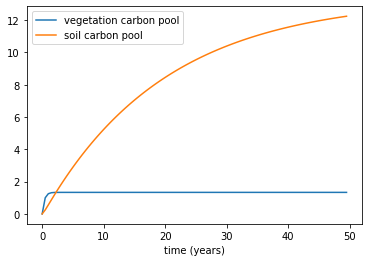

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import math

# constants
dt = .5 #change in time
t = 50 #total time 
# respiration turnover
rv = 1/1
tv = 1/2
rs = 1/20
# optimal GPP w/out environmental limitation
max_gpp = 2


# i represents the time step for analytical function
# analytical fxns return value between 0 and 1
def Alpha(i):
    return .5*math.sin(i) + .5
    #cycle, need .5's to return values between zero and one
        
def Beta(i):
    return .5*math.sin(i + 3) + .5
    #period offset from alpha
       
def Y(i):
    return abs(math.sin(2.2*i))
    # spikes
       

def Theta(i):
    return (1/100)*i
    #steadily increasing
   

#prognostic functions
#cv is vegetation carbon pool, cs is soil carbon pool
def CV(cv, gpp):
    return dt*(gpp - rv*cv - tv*cv) + cv

def CS(cv, cs):
    return dt*(tv*cv - rs*cs) + cs

#gross primary production diagnostic eq
def GPP(a, b, y, theta):
    return max_gpp*a*b*y*theta


#forcing 
f0 = 240
f1 = 200
f2 = 50
def F(time, diurnal, seasonal):
    return f0 + f1*np.sin(diurnal*time) 
    + f2*np.sin(seasonal*time)


# ********** Seperate this process from model ****
vegetation = np.zeros(int(t/dt))
soil = np.zeros(int(t/dt))
#***************************************

Cv = 0
Cs = 0

for i in range(0, int(t/dt)):
    #*****************
    vegetation[i] = Cv
    soil[i] = Cs
    #*****************
    gpp = GPP(1, 1, 1, 1)
    Cv = CV(Cv, gpp)
    Cs = CS(Cv, Cs)

plt.plot(np.arange(0, t, dt), vegetation)
plt.plot(np.arange(0, t, dt), soil)
plt.xlabel("time (years)")
plt.legend(["vegetation carbon pool","soil carbon pool"])
plt.show()


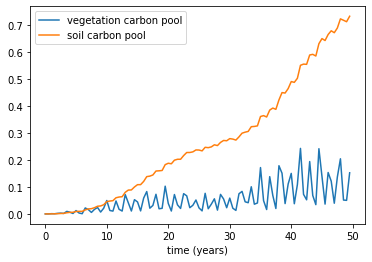

In [24]:
#reset values that we want to model
Cv = 0
Cs = 0

for i in range(0, int(t/dt)):
    #*****************
    vegetation[i] = Cv
    soil[i] = Cs
    #*****************
    #now we actually make these values a function of time
    alpha =  float(Alpha(i))
    beta = float(Beta(i))
    y = float(Y(i))
    theta = float(Theta(i))
    gpp = GPP(alpha, beta, y, theta)
    Cv = CV(Cv, gpp)
    Cs = CS(Cv, Cs)

plt.plot(np.arange(0, t, dt), vegetation)
plt.plot(np.arange(0, t, dt), soil)
plt.xlabel("time (years)")
plt.legend(["vegetation carbon pool","soil carbon pool"])
plt.show()

